# Use Case 2: Compare Generation Methods for a Single Dataset
1. Load data
2. Generate synthetitc data using multiple generation methods
3. Compare results and determine the supirior method for the data in question

## Imports

In [ ]:
from synthesizers import Load
import matplotlib.pyplot as plt
import pandas as pd

## Load data and synthesize

In [2]:
gen_methods = ["tvae", "bayesian_network", "privbayes", "adsgan", "ctgan", "ddpm"]
result_name = "breasts_methods"

* `split_size`: Proportion of data used for training. The rest is used for testing/evaluation.
* `train_plugin`: Can take a list of plugin names that are passed to the `train_adapter` (`synthcity` by default).
* `gen_count`: Number of synthetic records to be generated.
* `n_jobs`: Numbeer of jobs to run in parallel.
* `eval_target_col`: Column name for an attribute used as the target for predictive evaluation methods.

The results are saved in a list; one element for each generation methods. To access the synthetic data for the first generation method: `state[0].synth`

In [3]:
state = Load("mstz/breast").Synthesize(split_size=0.8, train_plugin=gen_methods, gen_count=1e4, n_jobs=len(gen_methods), eval_target_col="is_cancer")

Generating train split: 683 examples [00:00, 6586.07 examples/s]
[2024-05-23T13:44:41.397056+0200][1048][CRITICAL] module disabled: c:\Users\lautrup\Documents\GitHub\synthesizers\temp_venv\lib\site-packages\synthcity\plugins\generic\plugin_goggle.py
 50%|█████     | 500/1000 [05:43<05:43,  1.46it/s]
[2024-05-23T13:50:27.353466+0200][1048][CRITICAL] module disabled: c:\Users\lautrup\Documents\GitHub\synthesizers\temp_venv\lib\site-packages\synthcity\plugins\generic\plugin_goggle.py
[2024-05-23T13:50:32.456311+0200][1048][CRITICAL] module disabled: c:\Users\lautrup\Documents\GitHub\synthesizers\temp_venv\lib\site-packages\synthcity\plugins\generic\plugin_goggle.py
100%|██████████| 9/9 [00:04<00:00,  1.89it/s]
[2024-05-23T13:50:38.027966+0200][1048][CRITICAL] module disabled: c:\Users\lautrup\Documents\GitHub\synthesizers\temp_venv\lib\site-packages\synthcity\plugins\generic\plugin_goggle.py
  5%|▌         | 549/10000 [03:39<1:03:00,  2.50it/s]
[2024-05-23T13:54:17.784759+0200][1048][CRIT

## Read output files and comapare results

In [4]:
state[2].eval

,metric,dim,val,err,n_val,n_err
0,avg_dwm_diff,u,0.156484,0.004697,0.843516,0.004697
1,pca_eigval_diff,u,0.436776,NaN,0.563224,NaN
2,pca_eigvec_ang,u,0.559131,NaN,0.822023,NaN
3,avg_cio,u,0.000000,0.000000,0.000000,0.000000
4,corr_mat_diff,u,4.915233,NaN,0.890773,NaN
5,mutual_inf_diff,u,2.294740,NaN,0.949006,NaN
6,ks_tvd_stat,u,0.246487,0.051533,0.753513,0.051533
7,frac_ks_sigs,u,0.900000,NaN,0.100000,NaN
8,avg_h_dist,u,0.001048,0.001048,0.998952,0.001048
9,avg_pMSE,u,0.006407,0.000174,0.974374,0.000696


In [5]:
results = pd.DataFrame(columns=["f1_diff", "auroc_diff"])

for i in range(len(gen_methods)):
    eval = state[i].eval.set_index("metric")
    results.loc[gen_methods[i]] = [eval.loc["cls_F1_diff", "val"], eval.loc["auroc", "val"]]
results

,f1_diff,auroc_diff
tvae,0.030067,0.003072
bayesian_network,0.039775,0.002304
privbayes,0.118565,0.004224
adsgan,0.006881,0.000000
ctgan,0.013269,0.001920
ddpm,0.009629,0.000384


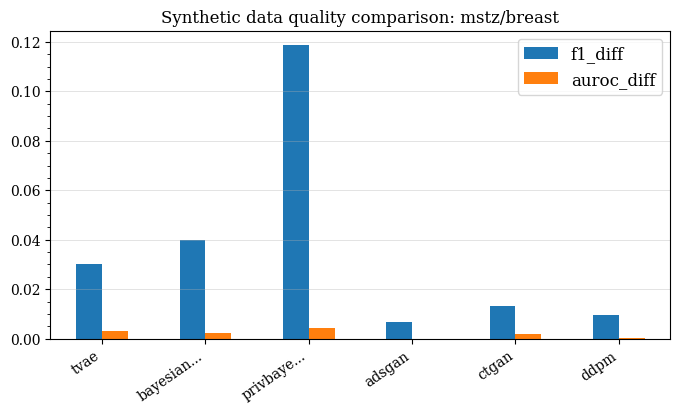

In [19]:
ax = results.plot.bar()
ax.figure.set_size_inches(8, 4)

def _shortened_labels(ax_get_ticks):
    max_label_length = 8
    labels = [label.get_text()[:max_label_length] + '...' if len(label.get_text()) > max_label_length else label.get_text() for label in ax_get_ticks]
    return labels

labels = _shortened_labels(ax.get_xticklabels())
ax.set_xticks(ax.get_xticks(), labels, rotation=35, ha='right')

ax.minorticks_on()
ax.xaxis.set_tick_params(which='minor', bottom=False)
ax.yaxis.grid(True, which='major', linestyle='-', linewidth='0.5',alpha=0.5)
ax.legend(loc='upper right', fontsize=12)

plt.title("Synthetic data quality comparison: mstz/breast", fontsize=12)
plt.savefig('histograms_of_model_performances.pdf')
plt.show()